In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

In [3]:
data = pd.read_csv('auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data= data.drop('car name', axis=1) # drop non-numeric column
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [6]:
origin = data.pop('origin')
data['uk'] = (origin == 1)*1
data['europ'] = (origin == 2)*2
data['usa'] = (origin == 3)*3
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,uk,europ,usa
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,2,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [7]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
data['horsepower'] = data['horsepower'].replace('?', 0)
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 0, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['mpg'] = scaler.fit_transform(data[['mpg']])

In [16]:
data['mpg']

0     -0.706439
1     -1.090751
2     -0.706439
3     -0.962647
4     -0.834543
         ...   
393    0.446497
394    2.624265
395    1.087017
396    0.574601
397    0.958913
Name: mpg, Length: 398, dtype: float64

In [17]:
scaler2 = StandardScaler()
data[['cylinders','displacement','horsepower','weight','acceleration','model year','uk','europ','usa']] = scaler2.fit_transform(data[['cylinders','displacement','horsepower','weight','acceleration','model year','uk','europ','usa']])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,uk,europ,usa
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,0.773559,-0.461968,-0.497643
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,0.773559,-0.461968,-0.497643
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,0.773559,-0.461968,-0.497643
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,0.773559,-0.461968,-0.497643
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,0.773559,-0.461968,-0.497643
...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.420063,-0.213324,0.011586,1.621983,0.773559,-0.461968,-0.497643
394,2.624265,-0.856321,-0.925936,-1.265436,-0.993671,3.279296,1.621983,-1.292726,2.164651,-0.497643
395,1.087017,-0.856321,-0.561039,-0.469791,-0.798585,-1.440730,1.621983,0.773559,-0.461968,-0.497643
396,0.574601,-0.856321,-0.705077,-0.594110,-0.408411,1.100822,1.621983,0.773559,-0.461968,-0.497643


In [18]:
y = data.pop('mpg')
X = data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for regression

C:\Users\rhmar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# earlyStopping to stop training when the validation loss is not decreasing
# reduceLROnPlateau to reduce the learning rate when the validation loss is not decreasing
# modelCheckpoint to save the best model

earlyStopping = EarlyStopping(monitor='val_loss', patience=20)
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
modelCheckpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model.fit(X_train, y_train, epochs=5000, batch_size=8, validation_split=0.2,
          callbacks=[earlyStopping, reduceLROnPlateau, modelCheckpoint])

Epoch 1/5000
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0658 - mae: 0.8599 - mse: 1.0658 

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.0043 - mae: 0.8286 - mse: 1.0043 - val_loss: 0.5867 - val_mae: 0.6386 - val_mse: 0.5867 - learning_rate: 0.0010
Epoch 2/5000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5344 - mae: 0.5975 - mse: 0.5344

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5324 - mae: 0.5921 - mse: 0.5324 - val_loss: 0.3392 - val_mae: 0.4771 - val_mse: 0.3392 - learning_rate: 0.0010
Epoch 3/5000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4018 - mae: 0.4644 - mse: 0.4018

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3837 - mae: 0.4543 - mse: 0.3837 - val_loss: 0.2156 - val_mae: 0.3693 - val_mse: 0.2156 - learning_rate: 0.0010
Epoch 4/5000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2348 - mae: 0.3340 - mse: 0.2348

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2348 - mae: 0.3379 - mse: 0.2348 - val_loss: 0.1813 - val_mae: 0.3430 - val_mse: 0.1813 - learning_rate: 0.0010
Epoch 5/5000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2240 - mae: 0.3461 - mse: 0.2240

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2173 - mae: 0.3405 - mse: 0.2173 - val_loss: 0.1676 - val_mae: 0.3334 - val_mse: 0.1676 - learning_rate: 0.0010
Epoch 6/5000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1958 - mae: 0.3073 - mse: 0.1958

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1905 - mae: 0.3053 - mse: 0.1905 - val_loss: 0.1638 - val_mae: 0.3301 - val_mse: 0.1638 - learning_rate: 0.0010
Epoch 7/5000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1867 - mae: 0.3080 - mse: 0.1867

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1825 - mae: 0.3043 - mse: 0.1825 - val_loss: 0.1628 - val_mae: 0.3345 - val_mse: 0.1628 - learning_rate: 0.0010
Epoch 8/5000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1748 - mae: 0.3074 - mse: 0.1748

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1711 - mae: 0.3031 - mse: 0.1711 - val_loss: 0.1614 - val_mae: 0.3265 - val_mse: 0.1614 - learning_rate: 0.0010
Epoch 9/5000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1683 - mae: 0.2829 - mse: 0.1683

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1657 - mae: 0.2822 - mse: 0.1657 - val_loss: 0.1594 - val_mae: 0.3226 - val_mse: 0.1594 - learning_rate: 0.0010
Epoch 10/5000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1188 - mae: 0.2525 - mse: 0.1188 - val_loss: 0.1594 - val_mae: 0.3198 - val_mse: 0.1594 - learning_rate: 0.0010
Epoch 11/5000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1585 - mae: 0.2845 - mse: 0.1585 - val_loss: 0.1657 - val_mae: 0.3261 - val_mse: 0.1657 - learning_rate: 0.0010
Epoch 12/5000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1353 - mae: 0.2632 - mse: 0.1353 - val_loss: 0.1651 - val_mae: 0.3234 - val_mse: 0.1651 - learning_rate: 0.0010
Epoch 13/5000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1172 - mae: 0.2558 - mse: 0.1172 - val_loss: 0.1615 - val_mae: 0.3110 - val_mse: 0.1615 - learning_rate: 0.0010
Epoch 14/5000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1357 - mae: 0.2591 - mse: 0.1357 - val_loss: 0.1631 - val_mae: 0.3180 - 

In [26]:
y_pred = model.predict(X_test)
y_pred[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[ 1.3065745 ],
       [ 0.73599124],
       [-0.32290655],
       [-0.9820916 ],
       [-1.269087  ]], dtype=float32)

In [27]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - 40ms/step - loss: 0.0930 - mae: 0.2326 - mse: 0.0930
Testing set Mean Abs Error:  0.23 MPG


In [29]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

y_test[:5], y_pred[:5]

(array([[ 1.21512091],
        [ 0.57460104],
        [-0.57833473],
        [-1.34695857],
        [-1.2188546 ]]),
 array([[ 1.3065745 ],
        [ 0.73599124],
        [-0.32290655],
        [-0.9820916 ],
        [-1.269087  ]], dtype=float32))

C:\Users\rhmar\AppData\Local\Temp\ipykernel_24956\3739612212.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


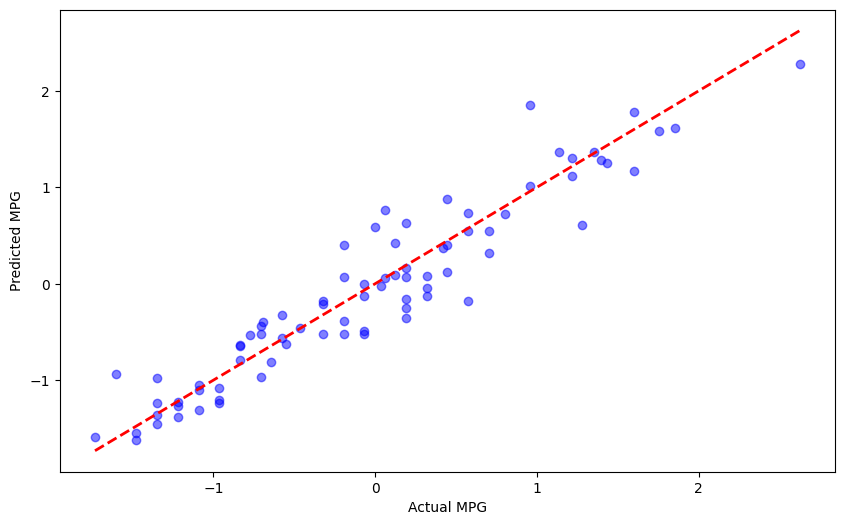

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()